In [25]:
df = pandas.read_csv('svm-data.csv', header=None)
y = df[0]
X = df.loc[0:, 0:]

In [26]:
X = df.loc[:, 1:]
#[c нулевой строки : по конец строки, с столбца: до столбца]

## Задание по программированию: Размер случайного леса

In [1]:
import pandas
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge
from scipy.sparse import hstack

In [2]:
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import KFold, cross_val_score

d:\Python\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# 1. Загрузите данные из файла abalone.csv. Это датасет, в котором требуется предсказать возраст ракушки (число колец)
# по физическим измерениям.

In [4]:
df = pandas.read_csv('abalone.csv')

In [5]:
df

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


In [6]:
# 2. Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1. Если вы используете Pandas,
# то подойдет следующий код: data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [7]:
df['Sex'] = df['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [8]:
df

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,-1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,-1,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,1,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,-1,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


In [9]:
# 3. Разделите содержимое файлов на признаки и целевую переменную. В последнем столбце записана целевая переменная,
# в остальных — признаки.

In [10]:
X = df.loc[:, 'Sex':'ShellWeight']
y = df['Rings']

In [11]:
# 4. Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50
# (не забудьте выставить "random_state=1" в конструкторе). Для каждого из вариантов оцените качество работы
# полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1" и "shuffle=True"
# при создании генератора кросс-валидации sklearn.cross_validation.KFold. В качестве меры качества воспользуйтесь
# долей правильных ответов (sklearn.metrics.r2_score).

In [12]:
kf = KFold(y.size, n_folds=5, shuffle=True, random_state=1)

scores = [0.0]
n_estimators = xrange(1, 51)
for n in n_estimators:
    model = RandomForestRegressor(n_estimators=n, random_state=1)
    score = numpy.mean(cross_val_score(model, X, y, cv=kf, scoring='r2'))
    scores.append(score)

In [13]:
# 5. Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации
# выше 0.52. Это количество и будет ответом на задание.

In [15]:
for n, score in enumerate(scores):
    if score > 0.52:
        print(1, n)
        break

(1, 22)


In [16]:
# 6. Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?

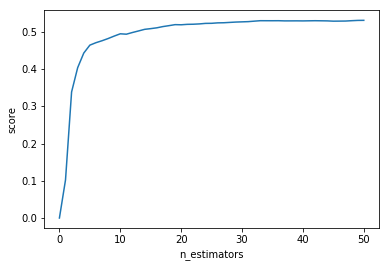

In [23]:
plt.plot(scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.savefig('estimators_score.png')
plt.show()

[]
<class 'matplotlib.figure.Figure'>


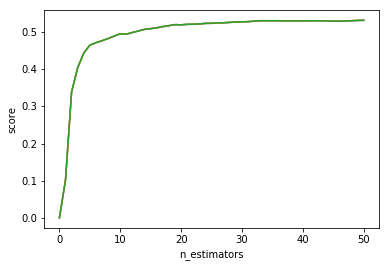

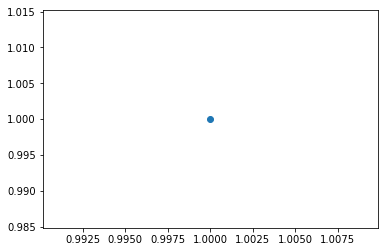

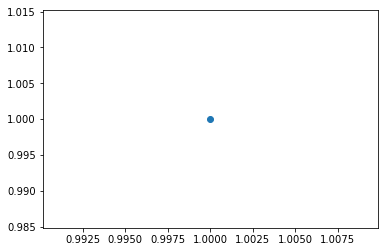

In [22]:
# Пример 1.4.1

import matplotlib.pyplot as plt

fig = plt.figure()   # Создание объекта Figure
print (fig.axes)   # Список текущих областей рисования пуст
print (type(fig))   # тип объекта Figure
plt.scatter(1.0, 1.0)   # scatter - метод для нанесения маркера в точке (1.0, 1.0)

# После нанесения графического элемента в виде маркера
# список текущих областей состоит из одной области
print (fig.axes)

# смотри преамбулу

plt.show()

## Задание по программированию: Градиентный бустинг над решающими деревьями

In [24]:
import pandas
import math
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [25]:
# 1. Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у
# датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776)
# содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую,
# используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.


In [26]:
df = pandas.read_csv('gbm-data.csv')
y = df['Activity'].values
X = df.loc[:, 'D1':'D1776'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

In [29]:
# 2. Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого
# значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:

In [30]:
def sigmoid(y_pred):
    # Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}),
    # где y_pred — предсказаное значение.
    return 1.0 / (1.0 + math.exp(-y_pred))


In [31]:
def log_loss_results(model, X, y):
    # Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке
    # на каждой итерации.
    results = []
    for pred in model.staged_decision_function(X):
        results.append(log_loss(y, [sigmoid(y_pred) for y_pred in pred]))

    return results

In [33]:
def plot_loss(learning_rate, test_loss, train_loss):
    # Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции
    # sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и
    # номер итерации, на которой оно достигается.
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.savefig('plots/rate_' + str(learning_rate) + '.png')

    min_loss_value = min(test_loss)
    min_loss_index = test_loss.index(min_loss_value)
    return min_loss_value, min_loss_index
plt.show()

In [34]:
plt.show()

In [43]:
def model_test(learning_rate):
    model = GradientBoostingClassifier(learning_rate=learning_rate, n_estimators=250, verbose=True, random_state=241)
    model.fit(X_train, y_train)

    train_loss = log_loss_results(model, X_train, y_train)
    test_loss = log_loss_results(model, X_test, y_test)
    return plot_loss(learning_rate, test_loss, train_loss)

In [44]:
min_loss_results = {}
for learning_rate in [1, 0.5, 0.3, 0.2, 0.1]:
    min_loss_results[learning_rate] = model_test(learning_rate)

      Iter       Train Loss   Remaining Time 
         1           1.0190           17.18s
         2           0.9192           16.86s
         3           0.8272           16.22s
         4           0.7834           15.87s
         5           0.7109           15.97s
         6           0.6368           16.06s
         7           0.5797           15.93s
         8           0.5610           15.73s
         9           0.5185           15.64s
        10           0.4984           15.38s
        20           0.1999           14.40s
        30           0.1313           13.30s
        40           0.0790           12.62s
        50           0.0511           11.98s
        60           0.0352           11.37s
        70           0.0245           10.71s
        80           0.0162           10.12s
        90           0.0114            9.52s
       100           0.0077            8.93s
       200           0.0004            2.66s


IOError: [Errno 2] No such file or directory: 'plots/rate_1.png'

In [45]:
# 3. Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации:переобучение
# (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

In [46]:
print(1, 'overfitting')

(1, 'overfitting')


In [47]:
# 4. Приведите минимальное значение log-loss и номер итерации, на котором оно достигается, при learning_rate = 0.2.

In [48]:
min_loss_value, min_loss_index = min_loss_results[0.2]
print(2, '{:0.2f} {}'.format(min_loss_value, min_loss_index))

KeyError: 0.2

In [49]:
# 5. На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором
# достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными
# параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что
# предсказания нужно получать с помощью функции predict_proba)

In [51]:
model = RandomForestClassifier(n_estimators=min_loss_index, random_state=241)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
test_loss = log_loss(y_test, y_pred)
print(3, test_loss)

NameError: name 'min_loss_index' is not defined